In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics 
import seaborn as sns 
import numpy as np
import TransformScript as ts

In [2]:
crimes = pd.DataFrame()
crimes = ts.run(crimes, 'data/Crime_Data_2010_2017.csv')
#print(crimes)

In [3]:
crimes = crimes[:len(crimes)//100]

In [6]:
''''Morning: 5am - 11:59am         0500 - 1159
    Afternoon: 12pm - 4:59pm       1200 - 1659
    Evening: 5:00pm - 8:59pm       1700 - 2059 
    Night: 9:00pm - 4:59am         2100 - 0459'''    

crimesTime = crimes['Time Occurred']
crimesTimeName = []
mornCount = 0
afterCount = 0
evenCount = 0
nightCount = 0
#set each time to morning, afternoon, evening or night 

for i in crimesTime:
    if i in range(500, 1159):
        crimesTimeName.append("Morning")
        mornCount += 1
    elif i in range(1200,1659):
        crimesTimeName.append("Afternoon")
        afterCount += 1
    elif i in range(1700, 2059):
        crimesTimeName.append("Evening")
        evenCount += 1
    elif i in range(2100, 2400) or i in range(0, 459):
        crimesTimeName.append("Night")
        nightCount += 1
    else:
        crimesTimeName.append("NaN")

#crimes['Time of Day'] = crimesTimeName

#print(len(crimes))
#print((crimesTime))

print('Crimes committed in the morning:',mornCount)
print('Crimes committed in the afternoon:',afterCount)
print('Crimes committed in the evening:',evenCount)
print('Crimes committed in the night:',nightCount)

Crimes committed in the morning: 3303
Crimes committed in the afternoon: 4113
Crimes committed in the evening: 3639
Crimes committed in the night: 4788


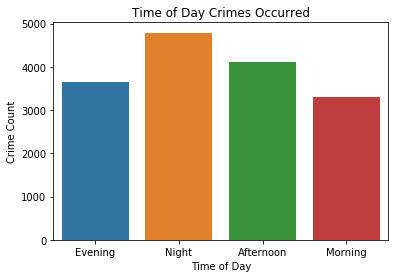

In [5]:
sns.countplot(crimes['Time of Day'], label = 'count')
plt.xlabel('Time of Day')
plt.ylabel('Crime Count')
plt.title("Time of Day Crimes Occurred")
plt.show()

In [8]:
crimes.columns

Index(['Time Occurred', 'Longitude', 'Latitude', 'Timestamp',
       'Area Name_Central', 'Area Name_Devonshire', 'Area Name_Foothill',
       'Area Name_Harbor', 'Area Name_Hollenbeck', 'Area Name_Hollywood',
       ...
       'Crime Code 4_821.0', 'Crime Code 4_860.0', 'Crime Code 4_910.0',
       'Crime Code 4_930.0', 'Crime Code 4_944.0', 'Crime Code 4_946.0',
       'Crime Code 4_998.0', 'Crime Code 4_999.0', 'Crime Code 4_nan',
       'Time of Day'],
      dtype='object', length=2198)

In [10]:
target = crimes.drop(columns = ['Time of Day','Time Occurred', 'Longitude', 'Latitude', 'Timestamp'])
target.head()

Area Name_Central  Area Name_Devonshire  Area Name_Foothill  \
0                  0                     0                   0   
1                  0                     0                   0   
2                  0                     0                   0   
3                  0                     0                   0   
4                  0                     0                   0   

   Area Name_Harbor  Area Name_Hollenbeck  Area Name_Hollywood  \
0                 0                     0                    0   
1                 0                     0                    0   
2                 0                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Area Name_Mission  Area Name_N Hollywood  Area Name_Newton  \
0                  0                      0                 0   
1                  0                      0                 0   
2                  0                      0                 0   
3                  0                      0                 0   
4                  0                      0                 0   

   Area Name_Northeast        ...         Crime Code 4_745.0  \
0                    0        ...                          0   
1                    0        ...                          0   
2                    0        ...                          0   
3                    0        ...                          0   
4                    0        ...                          0   

   Crime Code 4_821.0  Crime Code 4_860.0  Crime Code 4_910.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Crime Code 4_930.0  Crime Code 4_944.0  Crime Code 4_946.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Crime Code 4_998.0  Crime Code 4_999.0  Crime Code 4_nan  
0                   0                   0                 1  
1                   0                   0                 1  
2                   0                   0                 1  
3                   0                   0                 1  
4                   0                   0                 1  

[5 rows x 2193 columns]

In [23]:
y = crimesTimeName
#y = pd.get_dummies(data=crimesTimeName, prefix='Time of Day', drop_first=True , dummy_na=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(target, y, test_size = 0.2, random_state=0)

In [25]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier with k = 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3199747554433575


In [48]:
# Import confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[324 167 139 179]
 [188 186 102 235]
 [243 129 135 176]
 [224 211 102 429]]
              precision    recall  f1-score   support

   Afternoon       0.33      0.40      0.36       809
     Evening       0.27      0.26      0.26       711
     Morning       0.28      0.20      0.23       683
       Night       0.42      0.44      0.43       966

   micro avg       0.34      0.34      0.34      3169
   macro avg       0.33      0.33      0.32      3169
weighted avg       0.33      0.34      0.33      3169



In [47]:
k = 0
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(k,"Accuracy:",metrics.accuracy_score(y_test, y_pred))

1 Accuracy: 0.3243925528557905
2 Accuracy: 0.3026191227516567
3 Accuracy: 0.3209214263174503
4 Accuracy: 0.32660145156200693
5 Accuracy: 0.3199747554433575
6 Accuracy: 0.33796150205112024
7 Accuracy: 0.33701483117702746
8 Accuracy: 0.34427264121173873
9 Accuracy: 0.33796150205112024
10 Accuracy: 0.338908172925213


References:
https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [41]:
crimes2 = pd.read_csv('data/Crime_Data_2010_2017.csv')
crimes2 = crimes2[:len(crimes2)//100]
weapons = crimes2['Weapon Used Code']

nonViolentCount = 0
violent = []
violentCount = 0

for i in weapons:
    if i in range(100, 1000):
        violentCount += 1
        violent.append("Violent")
    else:
        nonViolentCount += 1
        violent.append("Non-Violent")

crimes['Violence'] = violent
del crimes2

In [42]:
violent = crimes[crimes['Violence'] == "Violent"]
nonviolent = crimes[crimes['Violence'] == "Non-violent"]
sns.countplot(x = "Time of Day", color = "green", data = crimes)
sns.countplot(x = "Time of Day", hue = "Violence", palette = {"Violent": "#FF0000", "Non-Violent": "#3333FF"}, data = crimes)
plt.ylabel("Crime Count")
plt.title("Time of Day Violent and Non-Violent Crimes Occurred")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

ss = StandardScaler()

clf = SVC(gamma='auto')

In [27]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  


In [37]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
clf.score(X_test, y_test)

0.30482802145787313

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()

In [44]:
clf2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
clf2.score(X_test, y_test)

0.3360681603029347